In [1]:
import zipfile
import os

zip_path = 'archive.zip'         
target_file = 'diabetes_binary_5050split_health_indicators_BRFSS2015.csv'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # List all files inside the zip (good for checking)
    print("Files inside the zip:")
    zip_ref.printdir()
    
    # Extract ONLY the one file you want to current directory
    if target_file in zip_ref.namelist():
        zip_ref.extract(target_file, path='.')   # '.' = current directory
        print(f"\nExtracted: {target_file}")
    else:
        print(f"\nFile '{target_file}' not found in zip. Check the list above.")

# Verify it's there now
print("\nCurrent directory after extraction:")
!ls -lh | grep diabetes

Files inside the zip:
File Name                                             Modified             Size
diabetes_012_health_indicators_BRFSS2015.csv   2021-11-08 16:49:06     22738151
diabetes_binary_5050split_health_indicators_BRFSS2015.csv 2021-11-08 16:49:06      6347570
diabetes_binary_health_indicators_BRFSS2015.csv 2021-11-08 16:49:06     22738154

Extracted: diabetes_binary_5050split_health_indicators_BRFSS2015.csv

Current directory after extraction:
-rw-r--r-- 1 eyobunix eyobunix 6.1M Feb 20 12:40 diabetes_binary_5050split_health_indicators_BRFSS2015.csv
-rw-r--r-- 1 eyobunix eyobunix 1.5K Feb 20 12:39 diabetes_ml_model.ipynb


## Section 1: Introduction and Data Exploration
**Objective**: This section provides an overview of the Diabetes Health Indicators dataset and performs Exploratory Data Analysis (EDA) to understand the relationships between lifestyle factors and diabetes.

**Significance**: Predicting diabetes is a critical task in public health. Early detection through indicators like BMI, Blood Pressure, and Diet allows for preventative lifestyle changes, reducing the long-term strain on healthcare systems and improving patient longevity


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
# the CSV file is in the same folder as our notebook
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

# Basic check
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


<class 'pandas.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth              70692 no

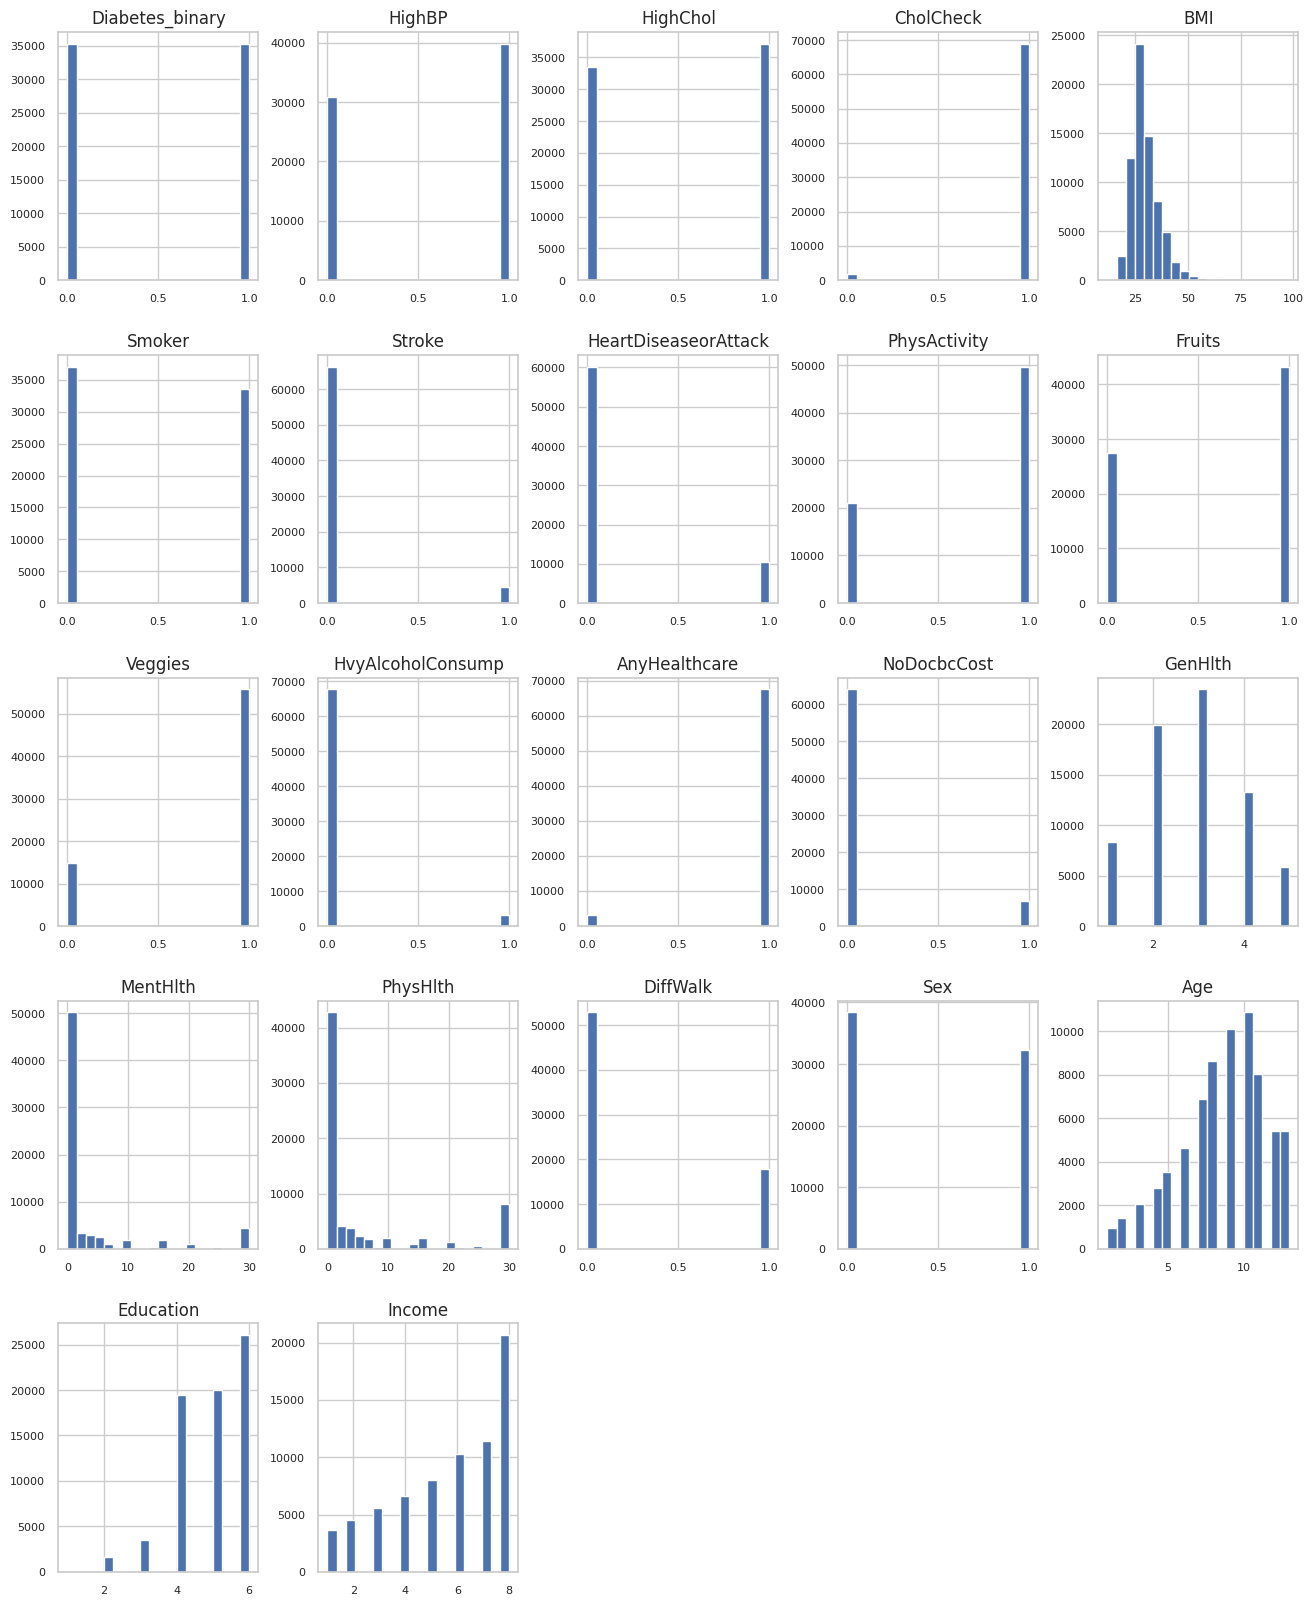

In [18]:
df.info()
df.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

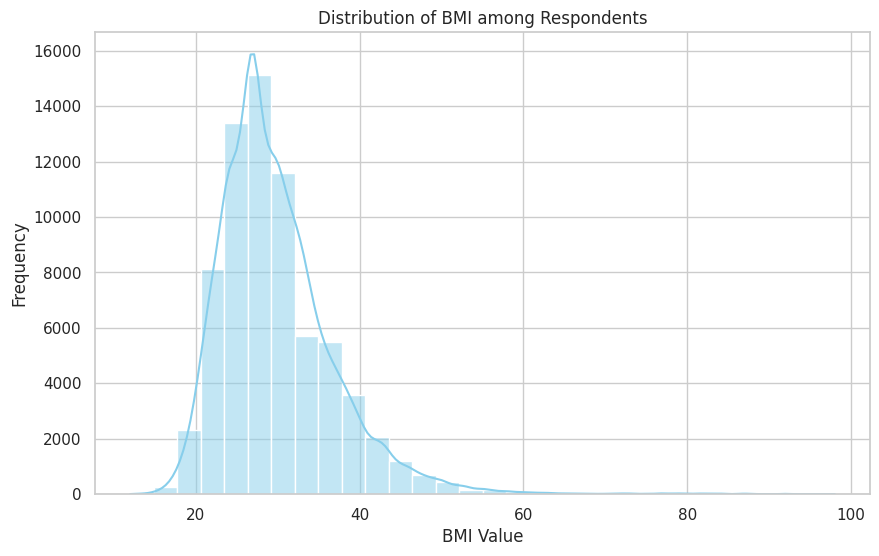

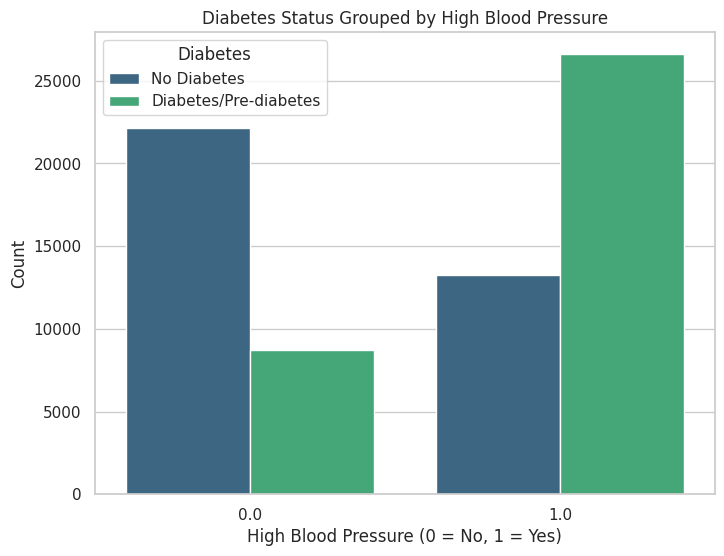

In [12]:
# Set the visual style for all plots
sns.set_theme(style="whitegrid")

# --- Univariate Analysis ---
# We want to see the distribution of BMI in our dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of BMI among Respondents')
plt.xlabel('BMI Value')
plt.ylabel('Frequency')
plt.show()

# --- Bivariate Analysis ---
# We want to see how High Blood Pressure relates to Diabetes status
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', hue='Diabetes_binary', data=df, palette='viridis')
plt.title('Diabetes Status Grouped by High Blood Pressure')
plt.xlabel('High Blood Pressure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes/Pre-diabetes'])
plt.show()

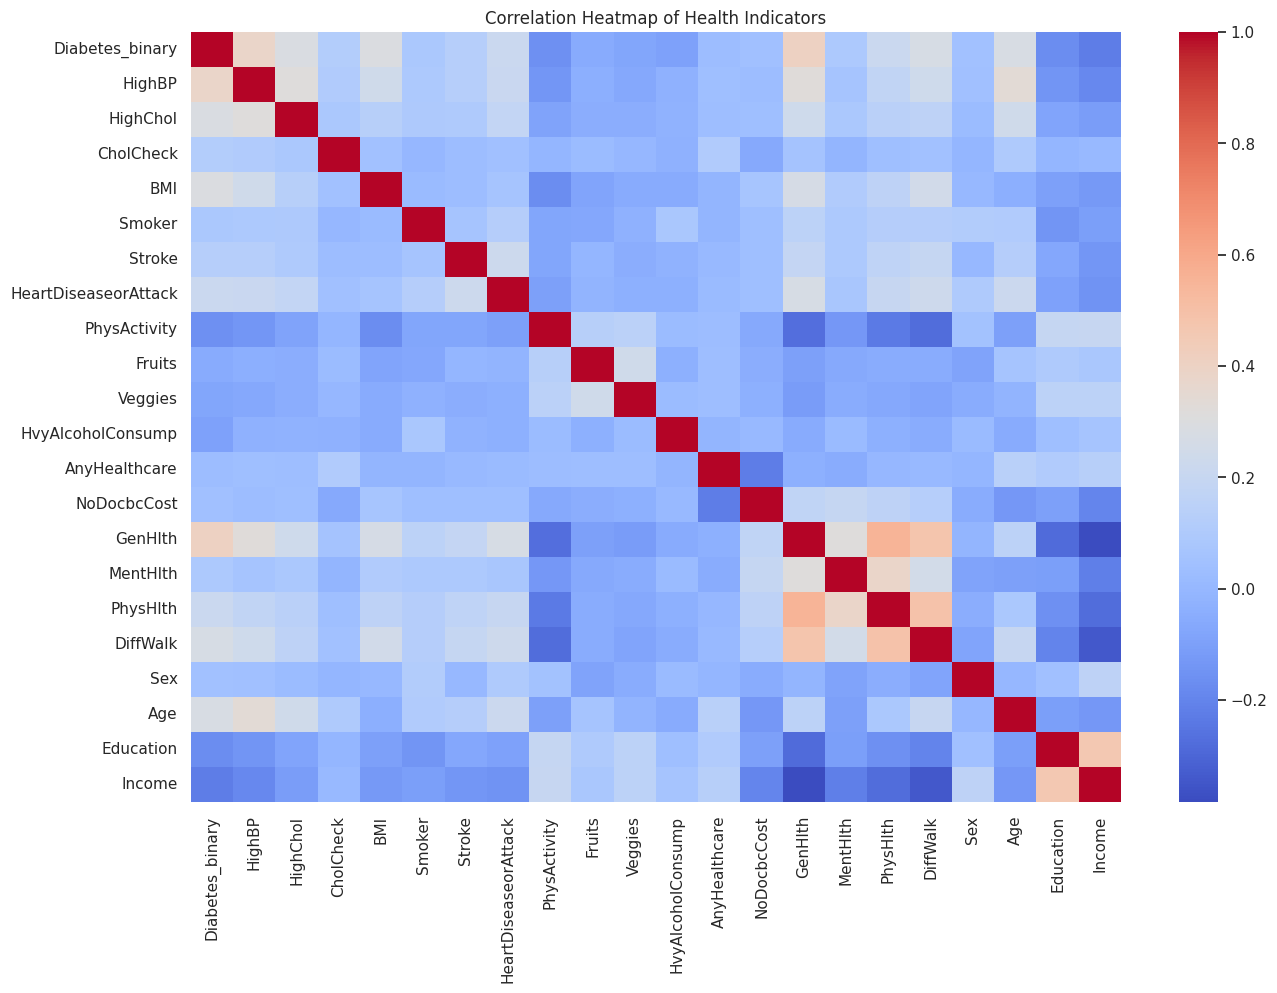

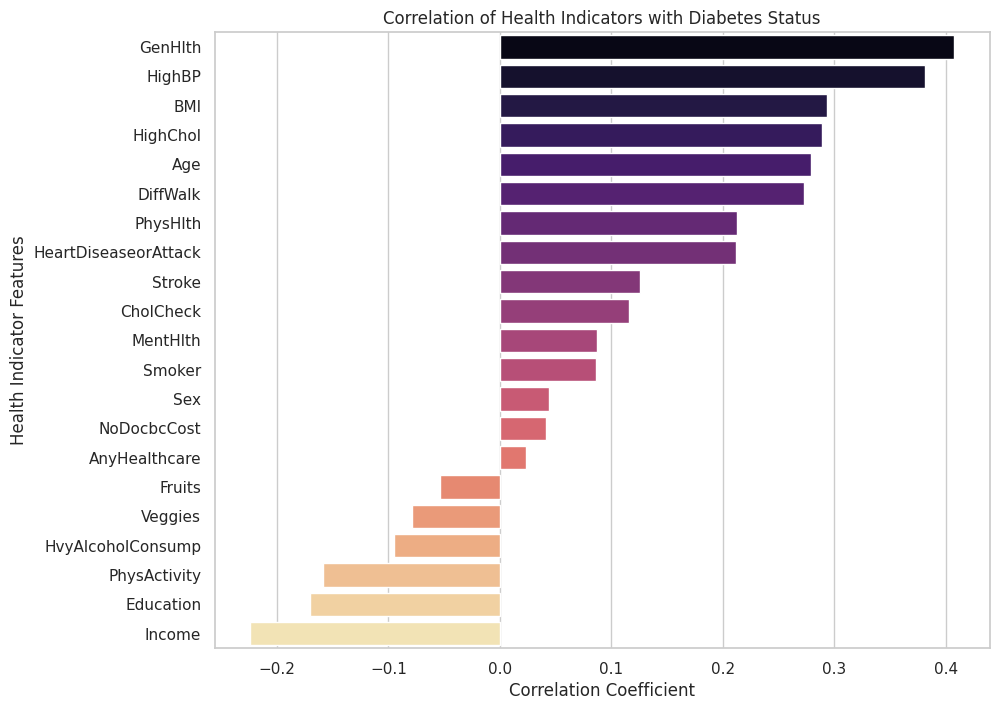

In [13]:
# --- Correlation Analysis ---
# Checking how all features relate to each other to identify patterns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Health Indicators')
plt.show()

# Calculate the correlation of all features specifically with the target variable
# We sort them so the most important features appear at the top
correlations = df.corr()['Diabetes_binary'].sort_values(ascending=False)

# Remove the target variable itself from the list (it would be a perfect 1.0)
correlations = correlations.drop('Diabetes_binary')

# Visualize the correlations using a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, hue=correlations.index, palette='magma')
plt.title('Correlation of Health Indicators with Diabetes Status')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Health Indicator Features')
plt.show()

## Section 2: Data Cleaning and Pre-processing

Observation on Missing Values: We performed a programmatic check across all 21 features. No missing values (NaN) were detected, confirming the dataset is complete and ready for modeling.

Handling Outliers: We specifically analyzed BMI for outliers as it is the primary continuous variable in our dataset. While we see values extending toward 100, we choose to retain them. In medical datasets, these "outliers" often represent the most high-risk patients (morbid obesity), and removing them would reduce the model's ability to predict diabetes in the very population that needs it most.

The reason we prioritize BMI for a boxplot is that it's a continuous variable. Most of the other features (like HighBP, Smoker, or Stroke) are categorical/binary (0 or 1). Income and Age are ordinal (1-8 or 1-13), so while they have more values than a binary 0/1, they still don't show the same type of "extreme spread" that BMI does.

Missing Values per Column:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


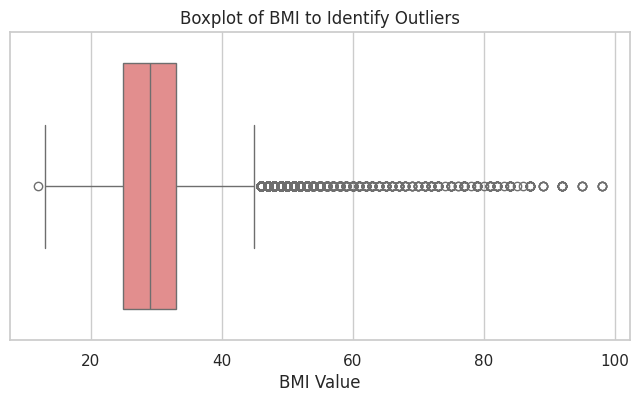

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [8]:
# Check for missing values in all columns
print("Missing Values per Column:")
print(df.isnull().sum())

# Visualizing outliers using a Boxplot for BMI
# Boxplots are the standard way to show outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['BMI'], color='lightcoral')
plt.title('Boxplot of BMI to Identify Outliers')
plt.xlabel('BMI Value')
plt.show()

# Descriptive statistics to understand the scale of our 21 features
# This helps us decide if we need to 'scale' the data later
df.describe()

## Section 3: Data Modelling and Data Splitting
The Supervised Learning Task: We are treating the prediction of Diabetes_binary as a Supervised Binary Classification problem. It is "supervised" because we have labeled historical data, and "binary" because the output is one of two classes: 0 (No Diabetes) or 1 (Diabetes/Pre-diabetes).

Splitting Strategy: We will use a 70/30 split. 70% of the data will be used to train our 4 classification models, and 30% will be held back as a "test set" to evaluate how the models perform on data they have never seen before.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Shuffling the dataset to ensure no ordering bias exists
# random_state=42 ensures the shuffle is reproducible
df_shuffled = shuffle(df, random_state=42)

# Separate features (X) and target (y) from the shuffled data
X = df_shuffled.drop('Diabetes_binary', axis=1)
y = df_shuffled['Diabetes_binary']

# Split into Training (70%) and Testing (30%)
# We use stratify=y to ensure the 50/50 balance is preserved in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Final Training set size: {X_train.shape[0]} samples")
print(f"Final Testing set size: {X_test.shape[0]} samples")

Final Training set size: 49484 samples
Final Testing set size: 21208 samples


## Section 4: Model Selection
Objective: To select four distinct classification algorithms that offer different mathematical approaches to the problem. This variety allows us to compare how "linear" vs "non-linear" models handle health survey data.

Chosen Models:

Logistic Regression: A fundamental linear model. It is highly interpretable and serves as our "baseline." It works well when the relationship between features and the target is relatively simple.

Random Forest Classifier: An "ensemble" method that builds multiple decision trees. It is robust to outliers and excellent at capturing complex interactions between health factors.
+1

Support Vector Machine (SVM): A model that finds the optimal "boundary" between classes. It is very powerful for binary classification in high-dimensional spaces (like our 21 features).

K-Nearest Neighbors (KNN): A "lazy learner" that classifies a person based on how similar their health profile is to others in the dataset. It is intuitive and non-parametric.

Neural Network (Multi-layer Perceptron): > This model is inspired by the structure of the human brain. It consists of layers of "neurons" that pass signals to one another. It is exceptionally powerful for identifying non-linear relationships in complex datasets like the CDC health survey.
Strength: Highly flexible; can model almost any relationship.
Weakness: Requires careful tuning of "hidden layers" and can be prone to overfitting if not monitored.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Initializing the Scaler
# We use StandardScaler to give all features a mean of 0 and variance of 1
scaler = StandardScaler()

# Scaling the features
# Note: we 'fit' only on the training data to avoid data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the 5 models with default parameters for now
# We set random_state where possible for reproducibility
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_svm = LinearSVC(max_iter=5000, random_state=42) # probability=True is needed for ROC curves later
model_knn = KNeighborsClassifier()
model_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42) # Initializing the Neural Network (one layer with 100 neurons)

print("Features scaled and models initialized successfully.")

Features scaled and models initialized successfully.


## Section 5: Model Training and Hyperparameter Tuning
Objective: To train our five selected models and optimize their performance through hyperparameter tuning and cross-validation.

Training Process: Each model is first trained on the scaled training set. To ensure the reliability of our results, we utilize 5-Fold Cross-Validation. This involves splitting the training data into five parts, training on four, and validating on the fifth, repeating the process five times.

Hyperparameter Tuning: We focus on the Random Forest and Neural Network for tuning, as these models have "complexity" settings that significantly impact performance. We use GridSearchCV or simple manual iteration to find the best settings for tree depth and layer size.

Starting 5-Fold Cross-Validation...

Logistic Regression: Accuracy = 0.7478 | Time = 1.84s
Random Forest: Accuracy = 0.7370 | Time = 16.49s
SVM: Accuracy = 0.7474 | Time = 0.39s
KNN: Accuracy = 0.7100 | Time = 2.55s
Neural Network: Accuracy = 0.7358 | Time = 146.47s


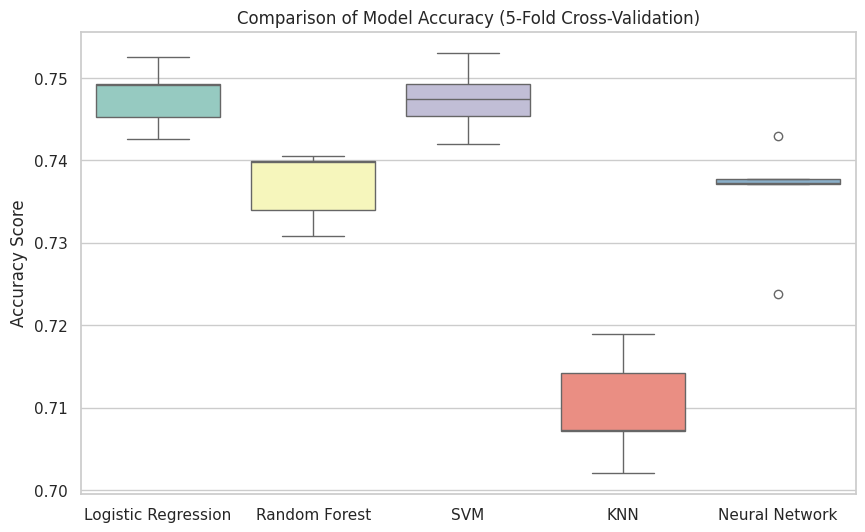

In [30]:
from sklearn.model_selection import cross_val_score
import numpy as np
import time

# Create a list of our initialized models for easy iteration
models = [
    ('Logistic Regression', model_lr),
    ('Random Forest', model_rf),
    ('SVM', model_svm),
    ('KNN', model_knn),
    ('Neural Network', model_nn)
]

# Dictionary to store cross-validation results
cv_results = {}
train_times = {}

print("Starting 5-Fold Cross-Validation...\n")

for name, model in models:
    start = time.time()
    # We use 5 folds (cv=5)
    # This evaluates the model based on 'accuracy'
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    end = time.time()
    cv_results[name] = scores
    train_times[name] = end - start
    print(f"{name}: Accuracy = {scores.mean():.4f} | Time = {train_times[name]:.2f}s")

# Visualization of Cross-Validation Results
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(cv_results), palette='Set3')
plt.title('Comparison of Model Accuracy (5-Fold Cross-Validation)')
plt.ylabel('Accuracy Score')
plt.show()

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer, f1_score
from tqdm.notebook import tqdm

# Defining the parameter grids for each model
param_lr = {'C': [0.1, 1, 10], 'max_iter': [1000]}
param_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'random_state': [42]}
param_svm = {'C': [0.1, 1, 10], 'max_iter': [5000], 'random_state': [42]}
param_knn = {'n_neighbors': [3, 5, 11]}
param_nn = {'hidden_layer_sizes': [(100,), (50, 50)], 'alpha': [0.0001, 0.05], 'random_state': [42]}

# We will store the 'Best' version of each model here
tuned_models = {}

# Configuration list using your specific variable names
search_configs = [
    ('Logistic Regression', model_lr, param_lr),
    ('Random Forest', model_rf, param_rf),
    ('SVM', model_svm, param_svm),
    ('KNN', model_knn, param_knn),
    ('Neural Network', model_nn, param_nn)
]

print("Starting Hyperparameter Tuning...")

for name, model, params in tqdm(search_configs, desc="Tuning Models"):
    # We use cv=3 for speed during tuning
    # We optimize for F1-score to ensure balance between Precision and Recall
    rs = RandomizedSearchCV(model, params, n_iter=2, cv=3, scoring='f1', random_state=42)
    rs.fit(X_train_scaled, y_train)
    
    # Store the best estimator
    tuned_models[name] = rs.best_estimator_
    print(f"Finished tuning {name}. Best Params: {rs.best_params_}")

print("\nAll models have been tuned and are ready for evaluation.")

Starting Hyperparameter Tuning...


Tuning Models:   0%|          | 0/5 [00:00<?, ?it/s]

Finished tuning Logistic Regression. Best Params: {'max_iter': 1000, 'C': 0.1}
Finished tuning Random Forest. Best Params: {'random_state': 42, 'n_estimators': 200, 'max_depth': 10}
Finished tuning SVM. Best Params: {'random_state': 42, 'max_iter': 5000, 'C': 1}
Finished tuning KNN. Best Params: {'n_neighbors': 5}
Finished tuning Neural Network. Best Params: {'random_state': 42, 'hidden_layer_sizes': (50, 50), 'alpha': 0.05}

All models have been tuned and are ready for evaluation.


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, f1_score

# --- ADDING THE VOTING ENSEMBLE ---
# We take our best tuned models and put them in a 'team'
voting_clf = VotingClassifier(
    estimators=[
        ('lr', tuned_models['Logistic Regression']),
        ('rf', tuned_models['Random Forest']),
        ('svm', tuned_models['SVM']), # Note: LinearSVC needs calibration for 'soft' voting, so we'll use 'hard' voting here
        ('knn', tuned_models['KNN']),
        ('nn', tuned_models['Neural Network'])
    ],
    voting='hard' # 'hard' means majority rule
)

# Training the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)
tuned_models['Voting Ensemble'] = voting_clf

# --- QUICK ACCURACY CHECK ---
print("Quick comparison of Tuned Models on Test Set:")
print("-" * 45)
for name, model in tuned_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name:20} | Acc: {acc:.4f} | F1: {f1:.4f}")

In [ ]:
print("hello")